<a href="https://colab.research.google.com/github/noheat61/my.Avatar-AI/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Oct  9 02:32:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **SetUp**

In [2]:
# git clone
import os

!git clone https://github.com/noheat61/my.Avatar-AI avatar-ai
os.chdir(f'./avatar-ai')

Cloning into 'avatar-ai'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 199 (delta 24), reused 160 (delta 15), pack-reused 0
Receiving objects: 100% (199/199), 9.89 MiB | 1.97 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [3]:
!pip install face-alignment ninja kornia yacs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 15.0 MB/s 
     |████████████████████████████████| 565 kB 29.8 MB/s 
  Created wheel for face-alignment: filename=face_alignment-1.3.5-py2.py3-none-any.whl size=28241 sha256=2ea1a8f09c792729836697b6292096853dcc25b6a7dd20820466c510dcbd884d
  Stored in directory: /root/.cache/pip/wheels/c9/ba/4d/2d368f55e5f929f9472da59e356fbdf1483f885de80a5bc620
Successfully built face-alignment


In [4]:
!pip install fvcore chumpy

import sys
import torch
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.8 MB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=b616e6066ee0ac71722962f4ec2e18a3bd246faf4a5b119123f83f4cff2bda00
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31549 sha256=f85266a1383a9b35d4bf51339dcfebcbc0da659063b8112eb7399270b28b8ec3
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef656b01c84b9185196513ef2faf74a5a379b043a7
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58285 sha256=748f5fc764320711aeb99063a97175e4dc2edce4f04fac47e138281f1d49e3c7
  Stored in directory: /root/.cache/pip/wheels/59/68/de/

In [5]:
# 필요한 대용량 파일 다운로드
!python download_cartoon_data.py
!bash download_deca_model.sh

Downloading...
From: https://drive.google.com/uc?id=1PQutd-JboOCOZqmd95XWxWrO8gGEvRcO
To: /content/avatar-ai/CartoonStyleGAN/networks/AMERICAN.pt
100% 827M/827M [00:03<00:00, 274MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QQuZGtHgD24Dn5E21Z2Ik25EPng58MoU
To: /content/avatar-ai/CartoonStyleGAN/networks/AMERICAN_encoder.pt
100% 1.26G/1.26G [00:06<00:00, 202MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PILW-H4Q0W8S22TO4auln1Wgz8cyroH6
To: /content/avatar-ai/CartoonStyleGAN/networks/AMERICAN_DISNEY.pt
100% 829M/829M [00:02<00:00, 277MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yEky49SnkBqPhdWvSAwgK5Sbrc3ctz1y
To: /content/avatar-ai/CartoonStyleGAN/networks/AMERICAN_여신강림.pt
100% 829M/829M [00:03<00:00, 273MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
Fro

In [6]:
import os

if not os.path.exists("cartoon_image"):
    os.mkdir("cartoon_image")
if not os.path.exists("avatar"):
    os.mkdir("avatar")

# **Run with Your Own Image**

In [7]:
from google.colab import files
uploaded = files.upload()
image_name = list(uploaded.keys())[0]
print(image_name)

Saving 증명사진.jpg to 증명사진.jpg
증명사진.jpg


In [8]:
from infer import Model2D, Model3D

model2D = Model2D()
model3D = Model3D()

cartoon_path = "cartoon_image/"
avatar_path = "avatar/"

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth


  0%|          | 0.00/85.7M [00:00<?, ?B/s]

Downloading: "https://www.adrianbulat.com/downloads/python-fan/3DFAN4-4a694010b9.zip" to /root/.cache/torch/hub/checkpoints/3DFAN4-4a694010b9.zip


  0%|          | 0.00/91.9M [00:00<?, ?B/s]

Downloading: "https://www.adrianbulat.com/downloads/python-fan/depth-6c4283c0e0.zip" to /root/.cache/torch/hub/checkpoints/depth-6c4283c0e0.zip


  0%|          | 0.00/224M [00:00<?, ?B/s]

/content/avatar-ai/CartoonStyleGAN/op/conv2d_gradfix.py:89: UserWarning: conv2d_gradfix not supported on PyTorch 1.12.1+cu113. Falling back to torch.nn.functional.conv2d().
  f"conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d()."


Setting up Perceptual loss...


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Loading model from: /content/avatar-ai/CartoonStyleGAN/lpips/weights/v0.1/vgg.pth
...[net-lin [vgg]] initialized
...Done


perceptual: 0.0566; noise regularize: 0.2319; reconstruction: 0.0022; mse_img: 0.0022; mse_latent: 0.0015; lr: 0.0000 |: 100%|██████████| 1000/1000 [02:41<00:00,  6.20it/s]


'cartoon_image/'

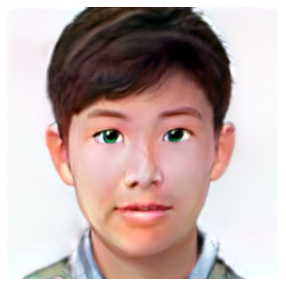

In [9]:
# 조금 더 애니메이션스러운 얼굴 -> swap_layer_num을 낮추기
# 조금 더 사실스러운 얼굴 -> swap_layer_num을 높이기(최대 6)
# 조금 더 자연스러운 얼굴 -> truncation을 낮추기

model2D.inference("AMERICAN", image_name, make_all=False, style="DISNEY", output_path=cartoon_path, swap_layer_num=4, truncation=0.6) # style: DISNEY, 여신강림

In [10]:
model3D.inference(input_path=cartoon_path, output_path=avatar_path)

Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip


  0%|          | 0.00/91.9M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


creating the FLAME Decoder
trained model found. load /content/avatar-ai/DECA/data/deca_model.tar


/usr/local/lib/python3.7/dist-packages/pytorch3d/io/obj_io.py:533: UserWarning: Mtl file does not exist: /content/avatar-ai/DECA/data/template.mtl
  warnings.warn(f"Mtl file does not exist: {f}")
100%|██████████| 1/1 [00:16<00:00, 16.69s/it]

-- please check the results in avatar/


'avatar/'

# **Download results**

In [11]:
from google.colab import files

!zip -r avatar_results.zip avatar
files.download("avatar_results.zip")

  adding: avatar/ (stored 0%)
  adding: avatar/증명사진-align-DISNEY/ (stored 0%)
  adding: avatar/증명사진-align-DISNEY/증명사진-align-DISNEY.obj (deflated 60%)
  adding: avatar/증명사진-align-DISNEY/증명사진-align-DISNEY_detail.obj (deflated 63%)
  adding: avatar/증명사진-align-DISNEY/증명사진-align-DISNEY.mtl (deflated 48%)
  adding: avatar/증명사진-align-DISNEY/증명사진-align-DISNEY.png (deflated 1%)
  adding: avatar/증명사진-align-DISNEY/증명사진-align-DISNEY_normals.png (deflated 4%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>